In [28]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from scipy.optimize import curve_fit
#import numpy as np
#import matplotlib.pyplot as plt

In [31]:
data_x = {} #create dictionaries
data_y = {}

for N in (10, 100, 1000):
    hf = h5py.File(f'/Users/labaniroy/Desktop/PHY_657_DATA_ANALYSIS/PHY657/Module_3/data_N{N}.h5', 'r')
    data_x[N] = hf['x'][()]
    data_y[N] = hf['y'][()]
    
#print(data_x[1000], data_y[1000])
X_train, Y_train = data_x[1000], data_y[1000]

input size 1
num layers 3
[1, 10, 10, 1]
Epoch 300 - Loss: 14.497951672757718
Test Loss: 3.4435142639274003


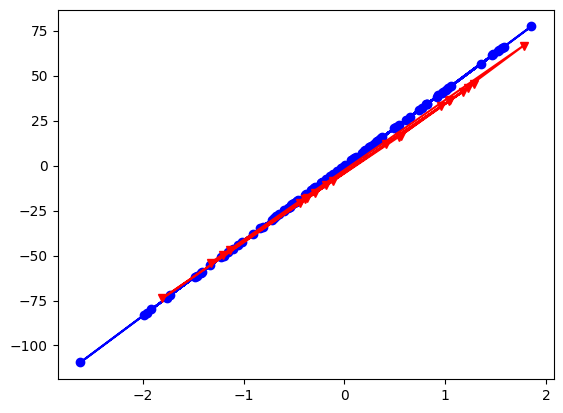

In [58]:
import numpy as np

class MLP:
    def __init__(self, input_size, hidden_sizes, output_size):
        self.input_size = input_size
        self.hidden_sizes = hidden_sizes
        self.output_size = output_size
        self.num_layers = len(hidden_sizes) + 1
        print('num layers',self.num_layers)
        # Initialize the weights and biases for each layer
        self.weights = []
        self.biases = []
        sizes = [input_size] + hidden_sizes + [output_size]
        print(sizes)
        for i in range(1, self.num_layers + 1):
            self.weights.append(np.random.randn(sizes[i], sizes[i-1]))
            #print(self.weights)
            self.biases.append(np.random.randn(sizes[i], 1))
        #print(self.weights)
        #print(self.biases)

    def forward(self, X):
        # Forward propagation through the network
        self.activations = [X]
        self.z = []
        for i in range(self.num_layers):
            z = np.dot(self.weights[i], self.activations[i]) + self.biases[i]
            self.z.append(z)
            if i < self.num_layers - 1:
                a = self.tanh(z)  # Tanh activation for hidden layers
            else:
                a = z  # Linear activation for output layer
            self.activations.append(a)
        return self.activations[-1]  # shape: (output_size, m)

    def backward(self, X, y):
        m = X.shape[1]  # Number of training examples

        # Compute gradients
        gradients = []
        dZ = self.activations[-1] - y  # shape: (output_size, m)
        for i in range(self.num_layers - 1, -1, -1):
            dW = (1 / m) * np.dot(dZ, self.activations[i].T)  # shape: (sizes[i], sizes[i-1])
            db = (1 / m) * np.sum(dZ, axis=1, keepdims=True)  # shape: (sizes[i], 1)
            gradients.append((dW, db))

            if i > 0:
                dA = np.dot(self.weights[i].T, dZ)  # shape: (sizes[i-1], m)
                dZ = dA * self.gradient_tanh(self.z[i-1])  # shape: (sizes[i-1], m)

        return gradients[::-1]  # Reverse the gradients

    def update_parameters(self, gradients, learning_rate):
        # Update parameters using gradients and learning rate
        for i in range(self.num_layers):
            self.weights[i] -= learning_rate * gradients[i][0]
            self.biases[i] -= learning_rate * gradients[i][1]

    def tanh(self, Z):
        # Hyperbolic tangent (tanh) activation function
        return np.tanh(Z)

    def gradient_tanh(self, Z):
        # Gradient of the hyperbolic tangent (tanh) activation function
        return 1 - np.tanh(Z)**2

if __name__ == "__main__":
    from sklearn.datasets import make_regression
    from sklearn.model_selection import train_test_split
    import matplotlib.pyplot as plt
    import numpy as np

    # Generate synthetic regression dataset
    X, y = make_regression(n_samples=100, n_features=1, noise=0.1, random_state=42)
    plt.plot(X,y,marker='o',color='blue')
    # Split the dataset into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Normalize the input data
    X_train_mean = np.mean(X_train)
    X_train_std = np.std(X_train)
    X_train = (X_train - X_train_mean) / X_train_std
    X_test = (X_test - X_train_mean) / X_train_std


    # Convert the targets to column vectors
    y_train = y_train.reshape(-1, 1)
    y_test = y_test.reshape(-1, 1)

    # Define the MLP model
    input_size = X_train.shape[1]
    print('input size',input_size)
    hidden_sizes = [10,10]
    output_size = y_train.shape[1]
    mlp = MLP(input_size, hidden_sizes, output_size)

    # Training parameters
    num_epochs = 300
    learning_rate = 0.01

    # Training loop
    for epoch in range(num_epochs):
        # Forward pass
        outputs = mlp.forward(X_train.T)

        # Backward pass and parameter update
        gradients = mlp.backward(X_train.T, y_train.T)
        mlp.update_parameters(gradients, learning_rate)

        # Compute and print loss
        loss = np.mean((outputs - y_train.T) ** 2)
        if (epoch + 1) % 300 == 0:
            print(f"Epoch {epoch+1} - Loss: {loss}")

    # Testing

    test_outputs = mlp.forward(X_test.T)
    test_loss = np.mean((test_outputs - y_test.T) ** 2)

    plt.plot(X_test,test_outputs.T,marker='v',color='red')
    print(f"Test Loss: {test_loss}")

# Expected output: python mlp.py
# Epoch 100 - Loss: 44.90146751314626
# Epoch 200 - Loss: 17.237643916038653
# Epoch 300 - Loss: 11.086144192016622
# Epoch 400 - Loss: 10.22319974279336
# Epoch 500 - Loss: 8.466082120818928
# Epoch 600 - Loss: 8.282733224106213
# Epoch 700 - Loss: 7.683443516506637
# Epoch 800 - Loss: 6.828497049035301
# Epoch 900 - Loss: 5.3875172263300515
# Epoch 1000 - Loss: 4.285790817435997
# Test Loss: 1.7334898114757362